In [224]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
import math
from imblearn.over_sampling import SMOTE


In [15]:
df = pd.read_csv('./data/Telcom_Customer.csv')

In [16]:
df = df.drop("customerID", axis=1)

# EDA

In [142]:
df.shape

(7043, 20)

In [17]:
print(df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

# Missing Values


TotalCharges        11

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [43]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: xlabel='tenure', ylabel='Count'>

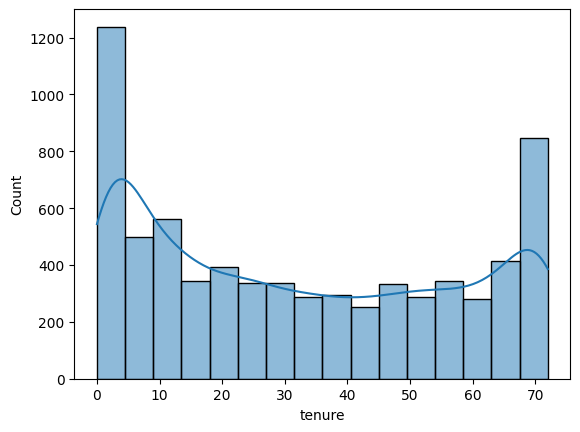

In [42]:
sns.histplot(df, x="tenure", kde= True)

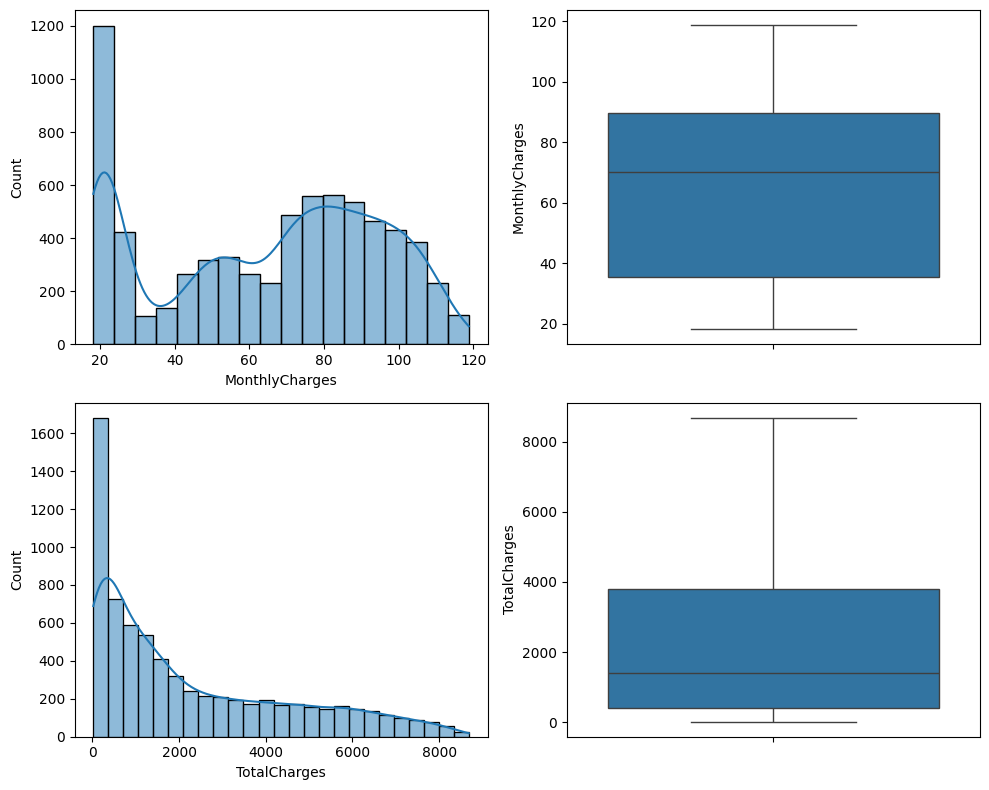

In [25]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

sns.histplot(df, x="MonthlyCharges", kde= True, ax=axes[0,0])
sns.boxplot(df, y = 'MonthlyCharges', ax=axes[0, 1])
sns.histplot(df, x = "TotalCharges",kde = True, ax=axes[1, 0])
sns.boxplot(df, y = 'TotalCharges', ax = axes[1,1])

plt.tight_layout()
plt.show()


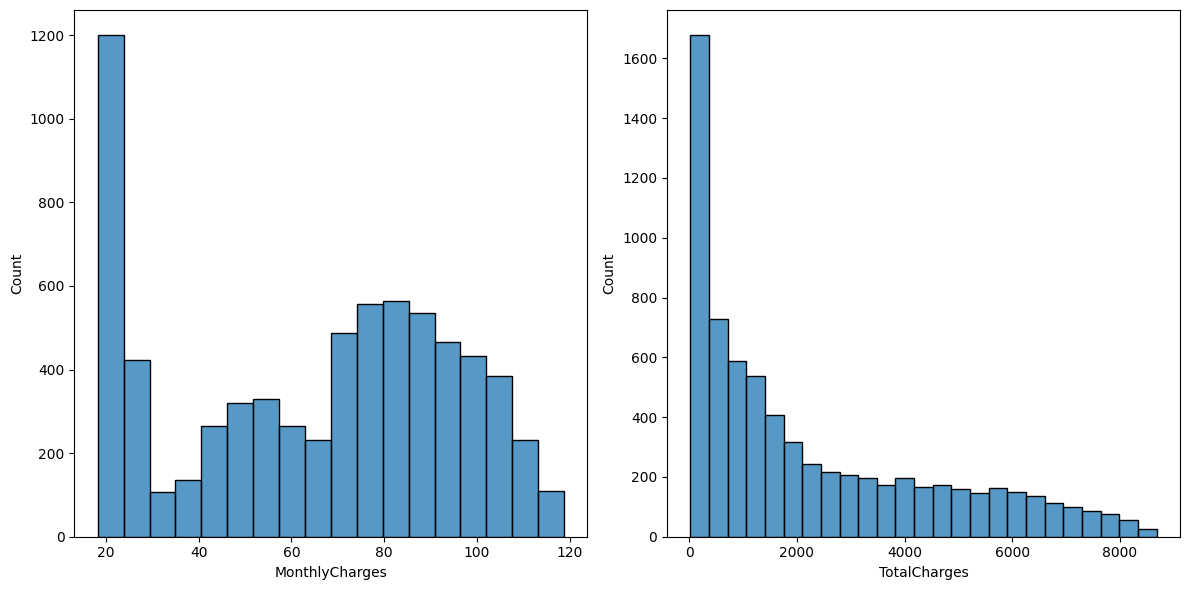

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

for i, column in enumerate(['MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=df, x=column, ax=axes[i])

plt.tight_layout()
plt.show()


In [39]:
Q1 = df["TotalCharges"].quantile(0.25)
Q3 = df["TotalCharges"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["TotalCharges"] < lower_bound) | (df["TotalCharges"] > upper_bound)]
outliers

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Outliers

No outliers - I used the IQR to check. see the above histogram plot

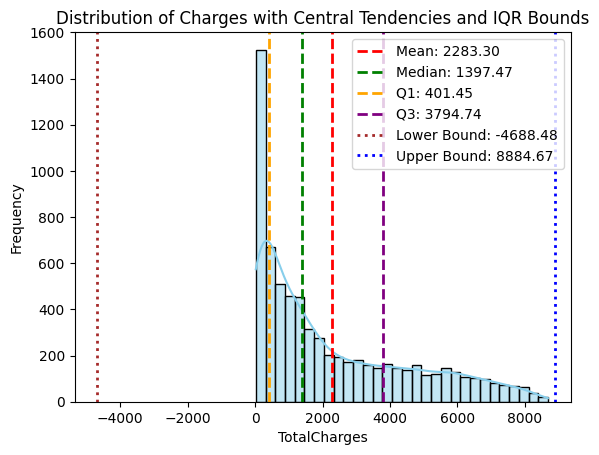

In [40]:
# Calculate stats
# Correct stats
mean_val = df['TotalCharges'].mean()
median_val = df['TotalCharges'].median()
q1 = df['TotalCharges'].quantile(0.25)
q3 = df['TotalCharges'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Plot
sns.histplot(df['TotalCharges'], kde=True, bins=30, color='skyblue')
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(q1, color='orange', linestyle='--', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='purple', linestyle='--', linewidth=2, label=f'Q3: {q3:.2f}')
plt.axvline(lower_bound, color='brown', linestyle=':', linewidth=2, label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='blue', linestyle=':', linewidth=2, label=f'Upper Bound: {upper_bound:.2f}')

plt.title('Distribution of Charges with Central Tendencies and IQR Bounds')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Some Insights
EDA suggested that customers with shorter tenures and higher monthly charges were more prone to churn in this dataset

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

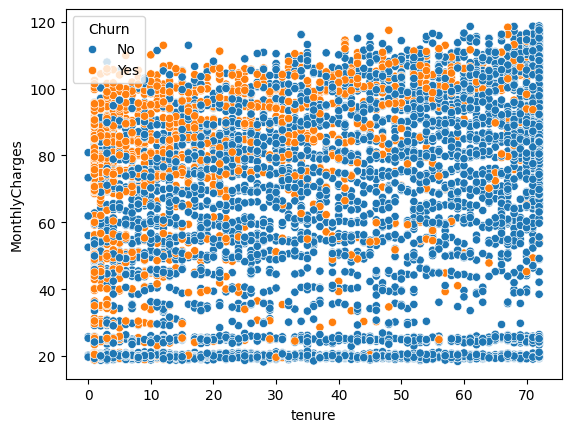

In [134]:
sns.scatterplot(df, x='tenure',y='MonthlyCharges', hue='Churn')

<Axes: xlabel='gender', ylabel='MonthlyCharges'>

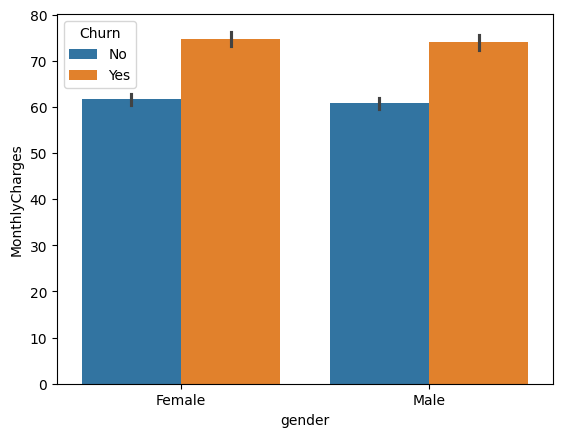

In [136]:
sns.barplot(df, x='gender',y='MonthlyCharges', hue='Churn')

### Target Variable 


We can see that Churn variable is imbalanced

<Axes: xlabel='Churn', ylabel='count'>

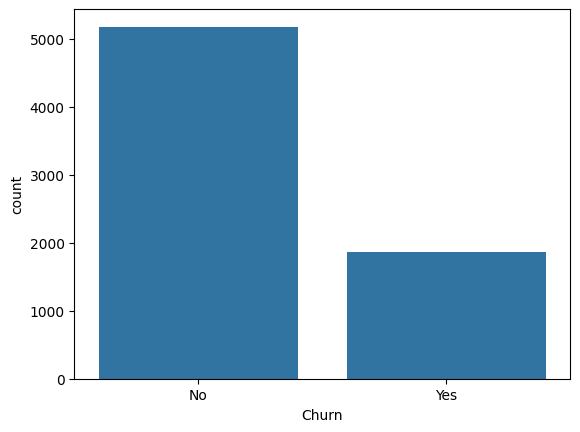

In [138]:
sns.countplot(x = df["Churn"])


In [140]:
#Make a function to plot categorical data according to target
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

In [152]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

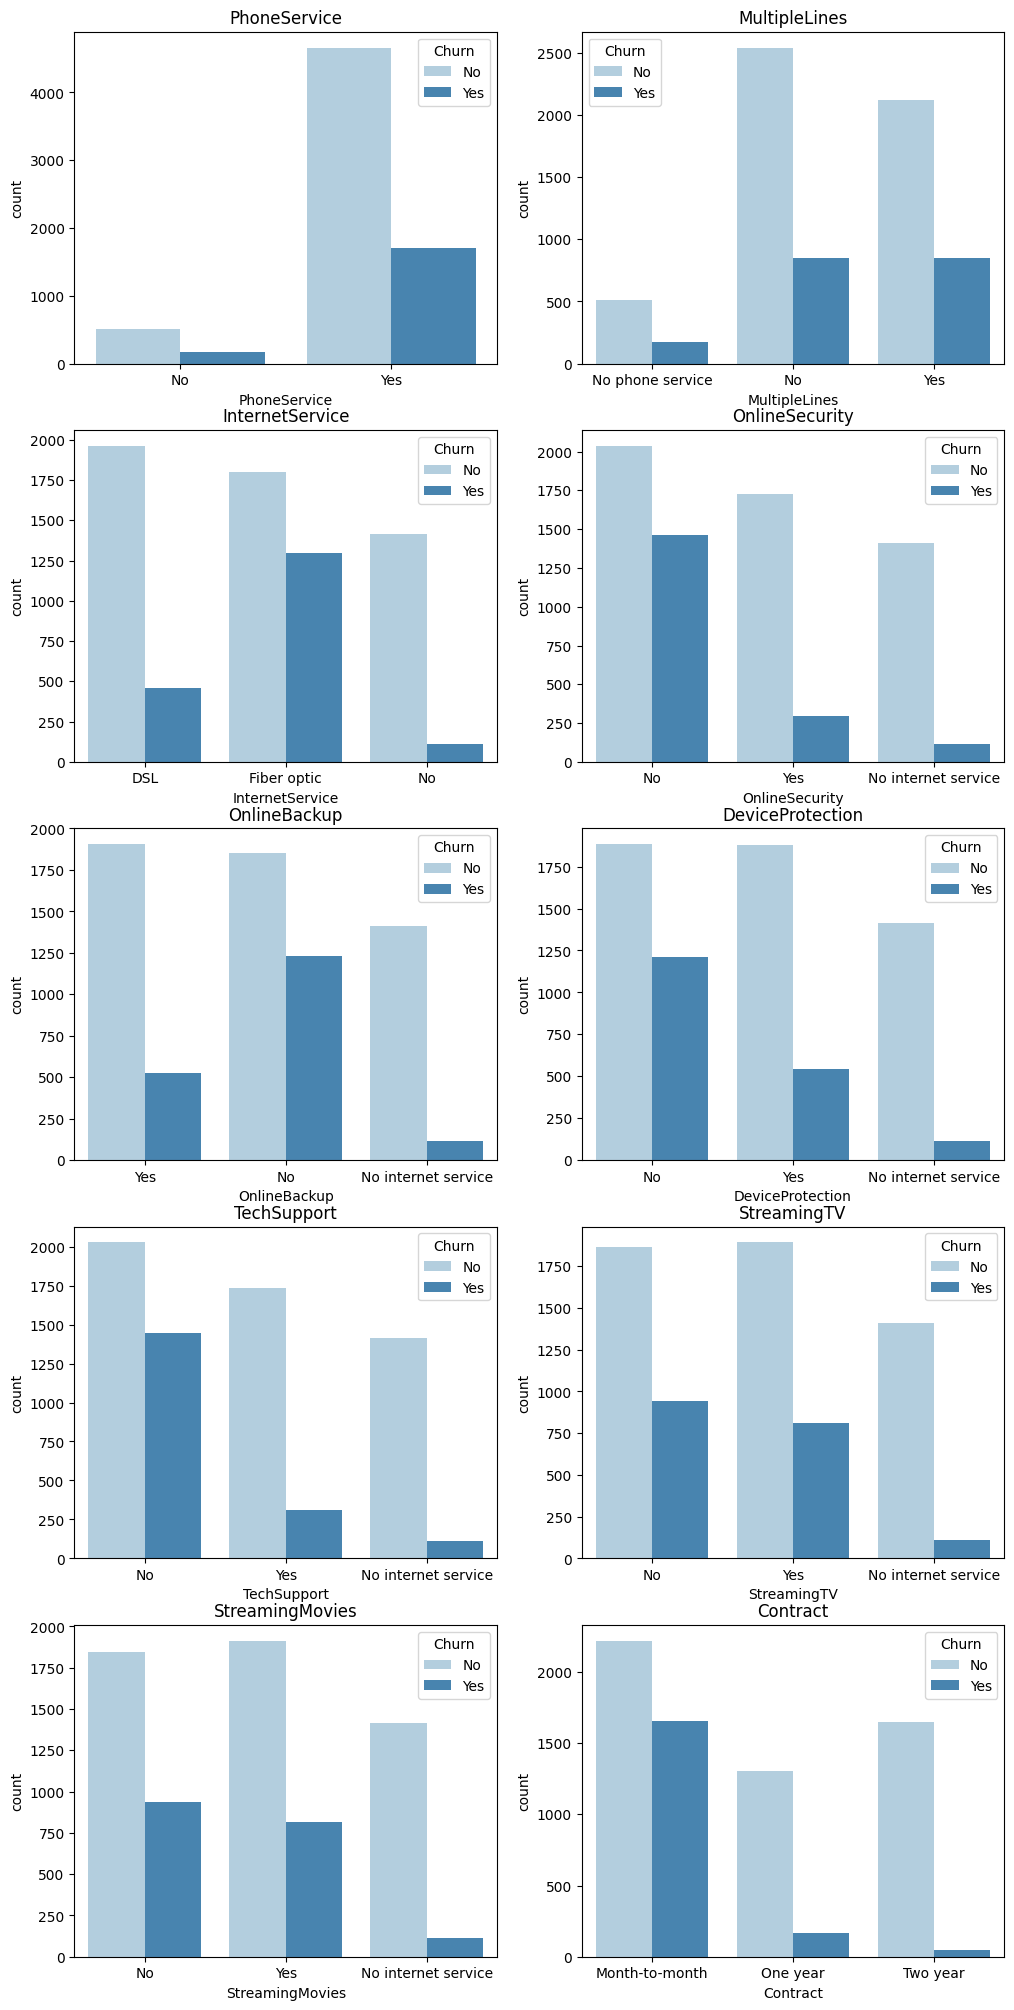

In [153]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies", 'Contract']
plot_categorical_to_target(df,customer_services, "Churn")

In [143]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

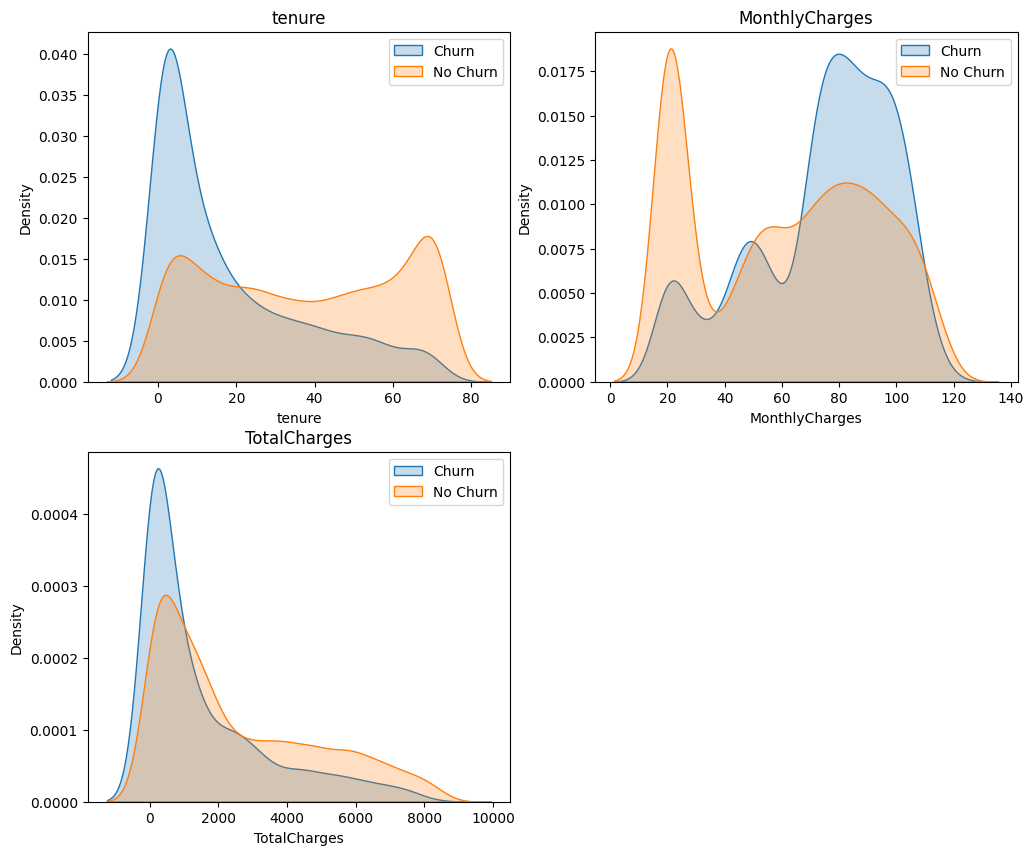

In [144]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

# Data Preprocessing

In [57]:
import pandas as pd
import numpy as np

class ChurnDataPreprocessor:
    def __init__(self):
        self.version = 1

    def data_ingestion(self, path):
        return pd.read_csv(path)

    def missing_percent(self, data, columns):
        missing_percent = {}
        for col in columns:
            percent = (data[col].isnull().sum() / len(data)) * 100
            missing_percent[col] = round(percent, 2)
        return missing_percent

    def impute_missing(self, data):
        data = data.copy()
        for column in data.columns:
            if data[column].isnull().sum() > 0:
                if data[column].dtype == "object":
                    data[column] = data[column].fillna(data[column].mode()[0])
                else:
                    skewness = data[column].skew()
                    if abs(skewness) > 1:
                        data[column] = data[column].fillna(data[column].median())
                    else:
                        data[column] = data[column].fillna(data[column].mean())
        return data

    def handle_outliers(self, data, numerical_columns):
        for col in numerical_columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
            data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
        return data

    def preprocess(self, data, numerical_columns):
        # Drop customerID if exists
        if 'customerID' in data.columns:
            data.drop(columns=['customerID'], inplace=True)

        # Fix TotalCharges dtype before imputation
        if 'TotalCharges' in data.columns:
            data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

        data = self.impute_missing(data)
        data = self.handle_outliers(data, numerical_columns)
        return data


In [58]:
preprocessor = ChurnDataPreprocessor()
df = preprocessor.data_ingestion("./data/Telcom_Customer.csv")

# Fix bad types before numeric processing
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

missing_info = preprocessor.missing_percent(df, df.columns)
print(missing_info)

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_clean = preprocessor.preprocess(df, numeric_cols)


{'customerID': 0.0, 'gender': 0.0, 'SeniorCitizen': 0.0, 'Partner': 0.0, 'Dependents': 0.0, 'tenure': 0.0, 'PhoneService': 0.0, 'MultipleLines': 0.0, 'InternetService': 0.0, 'OnlineSecurity': 0.0, 'OnlineBackup': 0.0, 'DeviceProtection': 0.0, 'TechSupport': 0.0, 'StreamingTV': 0.0, 'StreamingMovies': 0.0, 'Contract': 0.0, 'PaperlessBilling': 0.0, 'PaymentMethod': 0.0, 'MonthlyCharges': 0.0, 'TotalCharges': 0.16, 'Churn': 0.0}


In [190]:
df_clean.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
df_clean['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [64]:
df_clean['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

| Feature Type    | Features                                                                                                                                                               |
| --------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Binary (Yes/No) | `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `Churn`                                                                                         |
| One-hot encoded | `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaymentMethod` |
| Already numeric | `SeniorCitizen`, `tenure`, `MonthlyCharges`, `TotalCharges`                                                                                                            |


# Feature Encoding

In [191]:
class FeatureEncoder:
    def __init__(self) -> None:
        self.version = 1
        self.encoder = None 

    def encode_binary(self, data, binary_cols):
        data = data.copy()
        for col in binary_cols:
            if col == 'gender':
                data[col] = data[col].map({'Male': 1, 'Female': 0})
            else:
                data[col] = data[col].map({'Yes':1, 'No': 0})
        return data
    
    def encode_target(self, data, target_col = "Churn"):
        data[target_col] = data[target_col].map({'Yes': 1, 'No': 0})
        return data
    
    def one_hot_encode(self, data, categorical_cols):

        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
        encoded_arr = encoder.fit_transform(data[categorical_cols])

        encoded_df = pd.DataFrame(
            encoded_arr,
            columns = encoder.get_feature_names_out(categorical_cols),
            index = data.index
        )

        data = data.drop(columns = categorical_cols)
        data = pd.concat([data, encoded_df], axis = 1)
        return data
    
    def encode_all(self, data):
        """
        Main method: encodes binary, target, and one-hot features
        """
        binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
        one_hot_cols = [
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaymentMethod'
        ]

        data = self.encode_binary(data, binary_cols)
        data = self.encode_target(data, 'Churn')
        data = self.one_hot_encode(data, one_hot_cols)

        return data
    
        

In [192]:
encoder = FeatureEncoder()
df_encoded = encoder.encode_all(df_clean)


In [193]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   float64
 11  Mult

In [196]:
df_encoded.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [194]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [195]:
df_encoded.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370,...,0.290217,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.000258,0.441561,...,0.453895,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1400.550000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature engineering

In [207]:

def feature_engineering(df):
    df = df.copy()

    # 1. Tenure bucket (Short/Med/Long)
    df['tenure_group'] = pd.cut(
        df['tenure'],
        bins=[0, 12, 36, 72],
        labels=['Short', 'Medium', 'Long']
    )
    df['tenure_group'] = df['tenure_group'].cat.add_categories('New')
    df['tenure_group'].fillna('New', inplace=True)

    # 2. MonthlyCharge consistency
    df['avg_monthly_charge'] = df['TotalCharges'] / df['tenure']
    df['avg_monthly_charge'].replace([np.inf, -np.inf], 0, inplace=True)
    df['avg_monthly_charge'].fillna(0, inplace=True)

    # 3. Has streaming services
    df['has_streaming'] = (
        (df.get('StreamingTV_Yes', 0) + df.get('StreamingMovies_Yes', 0)) > 0
    ).astype(int)

    # 4. Number of services subscribed
    service_cols = [
        'PhoneService', 'MultipleLines_Yes',
        'OnlineSecurity_Yes', 'OnlineBackup_Yes',
        'DeviceProtection_Yes', 'TechSupport_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes'
    ]
    service_cols = [col for col in service_cols if col in df.columns]  # make sure they exist
    df['num_services'] = df[service_cols].sum(axis=1)

    return df

In [227]:
df_enhanced = feature_engineering(df_encoded)


/var/folders/h4/4f1dd3392y134gkcvw6sfk1r0000gn/T/ipykernel_81854/2034952214.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tenure_group'].fillna('New', inplace=True)
/var/folders/h4/4f1dd3392y134gkcvw6sfk1r0000gn/T/ipykernel_81854/2034952214.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [228]:
df_enhanced.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [229]:
df_enhanced['tenure_group'] = df_enhanced['tenure_group'].astype(str)  # Ensure no NaNs
ordinal_encoder = OrdinalEncoder(categories=[['Short', 'Medium', 'Long', 'New']])
df_enhanced['tenure_group_encoded'] = ordinal_encoder.fit_transform(df_enhanced[['tenure_group']])

In [231]:
df_enhanced.drop(columns=['tenure_group'], inplace=True)

In [232]:
df_enhanced.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,avg_monthly_charge,has_streaming,num_services,tenure_group_encoded
0,0,0,1,0,1.0,0,1,29.85,29.85,0,...,0.0,0.0,0.0,0.0,1.0,0.0,29.850000,0,1.0,0.0
1,1,0,0,0,34.0,1,0,56.95,1889.50,0,...,0.0,1.0,0.0,0.0,0.0,1.0,55.573529,0,3.0,1.0
2,1,0,0,0,2.0,1,1,53.85,108.15,1,...,0.0,0.0,0.0,0.0,0.0,1.0,54.075000,0,3.0,0.0
3,1,0,0,0,45.0,0,0,42.30,1840.75,0,...,0.0,1.0,0.0,0.0,0.0,0.0,40.905556,0,3.0,2.0
4,0,0,0,0,2.0,1,1,70.70,151.65,1,...,0.0,0.0,0.0,0.0,1.0,0.0,75.825000,0,1.0,0.0


# Feature Scale - numerical values

In [233]:
class FeatureScaler:
    def __init__(self):
        self.scaler = None
        self.version = 1

    def scale(self, data, numeric_cols):
        """
        Scales numeric features using StandardScaler (mean=0, std=1)

        Parameters:
        - data: DataFrame
        - numeric_cols: list of column names to scale

        Returns:
        - scaled DataFrame
        - fitted scaler (in case you want to inverse or apply to test set)
        """
        self.scaler = StandardScaler()
        data = data.copy()
        data[numeric_cols] = self.scaler.fit_transform(data[numeric_cols])
        return data

    def transform(self, data, numeric_cols):
        """
        Apply already-fitted scaler to new data (e.g., test set)
        """
        data = data.copy()
        data[numeric_cols] = self.scaler.transform(data[numeric_cols])
        return data

    def inverse_transform(self, data, numeric_cols):
        """
        Optional: reverse scaling (e.g., to interpret predictions)
        """
        data = data.copy()
        data[numeric_cols] = self.scaler.inverse_transform(data[numeric_cols])
        return data


In [236]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'avg_monthly_charge']

# Apply scaling
scaler = FeatureScaler()
df_scaled = scaler.scale(df_enhanced, numeric_cols)

In [237]:
df_scaled.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,avg_monthly_charge,has_streaming,num_services,tenure_group_encoded
count,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,-2.421273e-17,0.903166,0.592219,-6.406285e-17,8.070910e-17,0.265370,...,0.387903,0.209144,0.240664,0.216101,0.335794,0.228880,7.465592e-17,0.496805,3.362914,1.120403
std,0.500013,0.368612,0.499748,0.458110,1.000071e+00,0.295752,0.491457,1.000071e+00,1.000071e+00,0.441561,...,0.487307,0.406726,0.427517,0.411613,0.472301,0.420141,1.000071e+00,0.500025,2.062031,0.852507
min,0.000000,0.000000,0.000000,0.000000,-1.318165e+00,0.000000,0.000000,-1.545860e+00,-9.998503e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.137475e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.516817e-01,1.000000,0.000000,-9.725399e-01,-8.305558e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.597171e-01,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.372744e-01,1.000000,1.000000,1.857327e-01,-3.897629e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.850696e-01,0.000000,3.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,9.214551e-01,1.000000,1.000000,8.338335e-01,6.637555e-01,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.416645e-01,1.000000,5.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.613701e+00,1.000000,1.000000,1.794352e+00,2.826469e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.873292e+00,1.000000,8.000000,3.000000


In [257]:
corr_matrix = df_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

['MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [258]:
corr_matrix = df_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_reduced = df_scaled.drop(columns=to_drop)


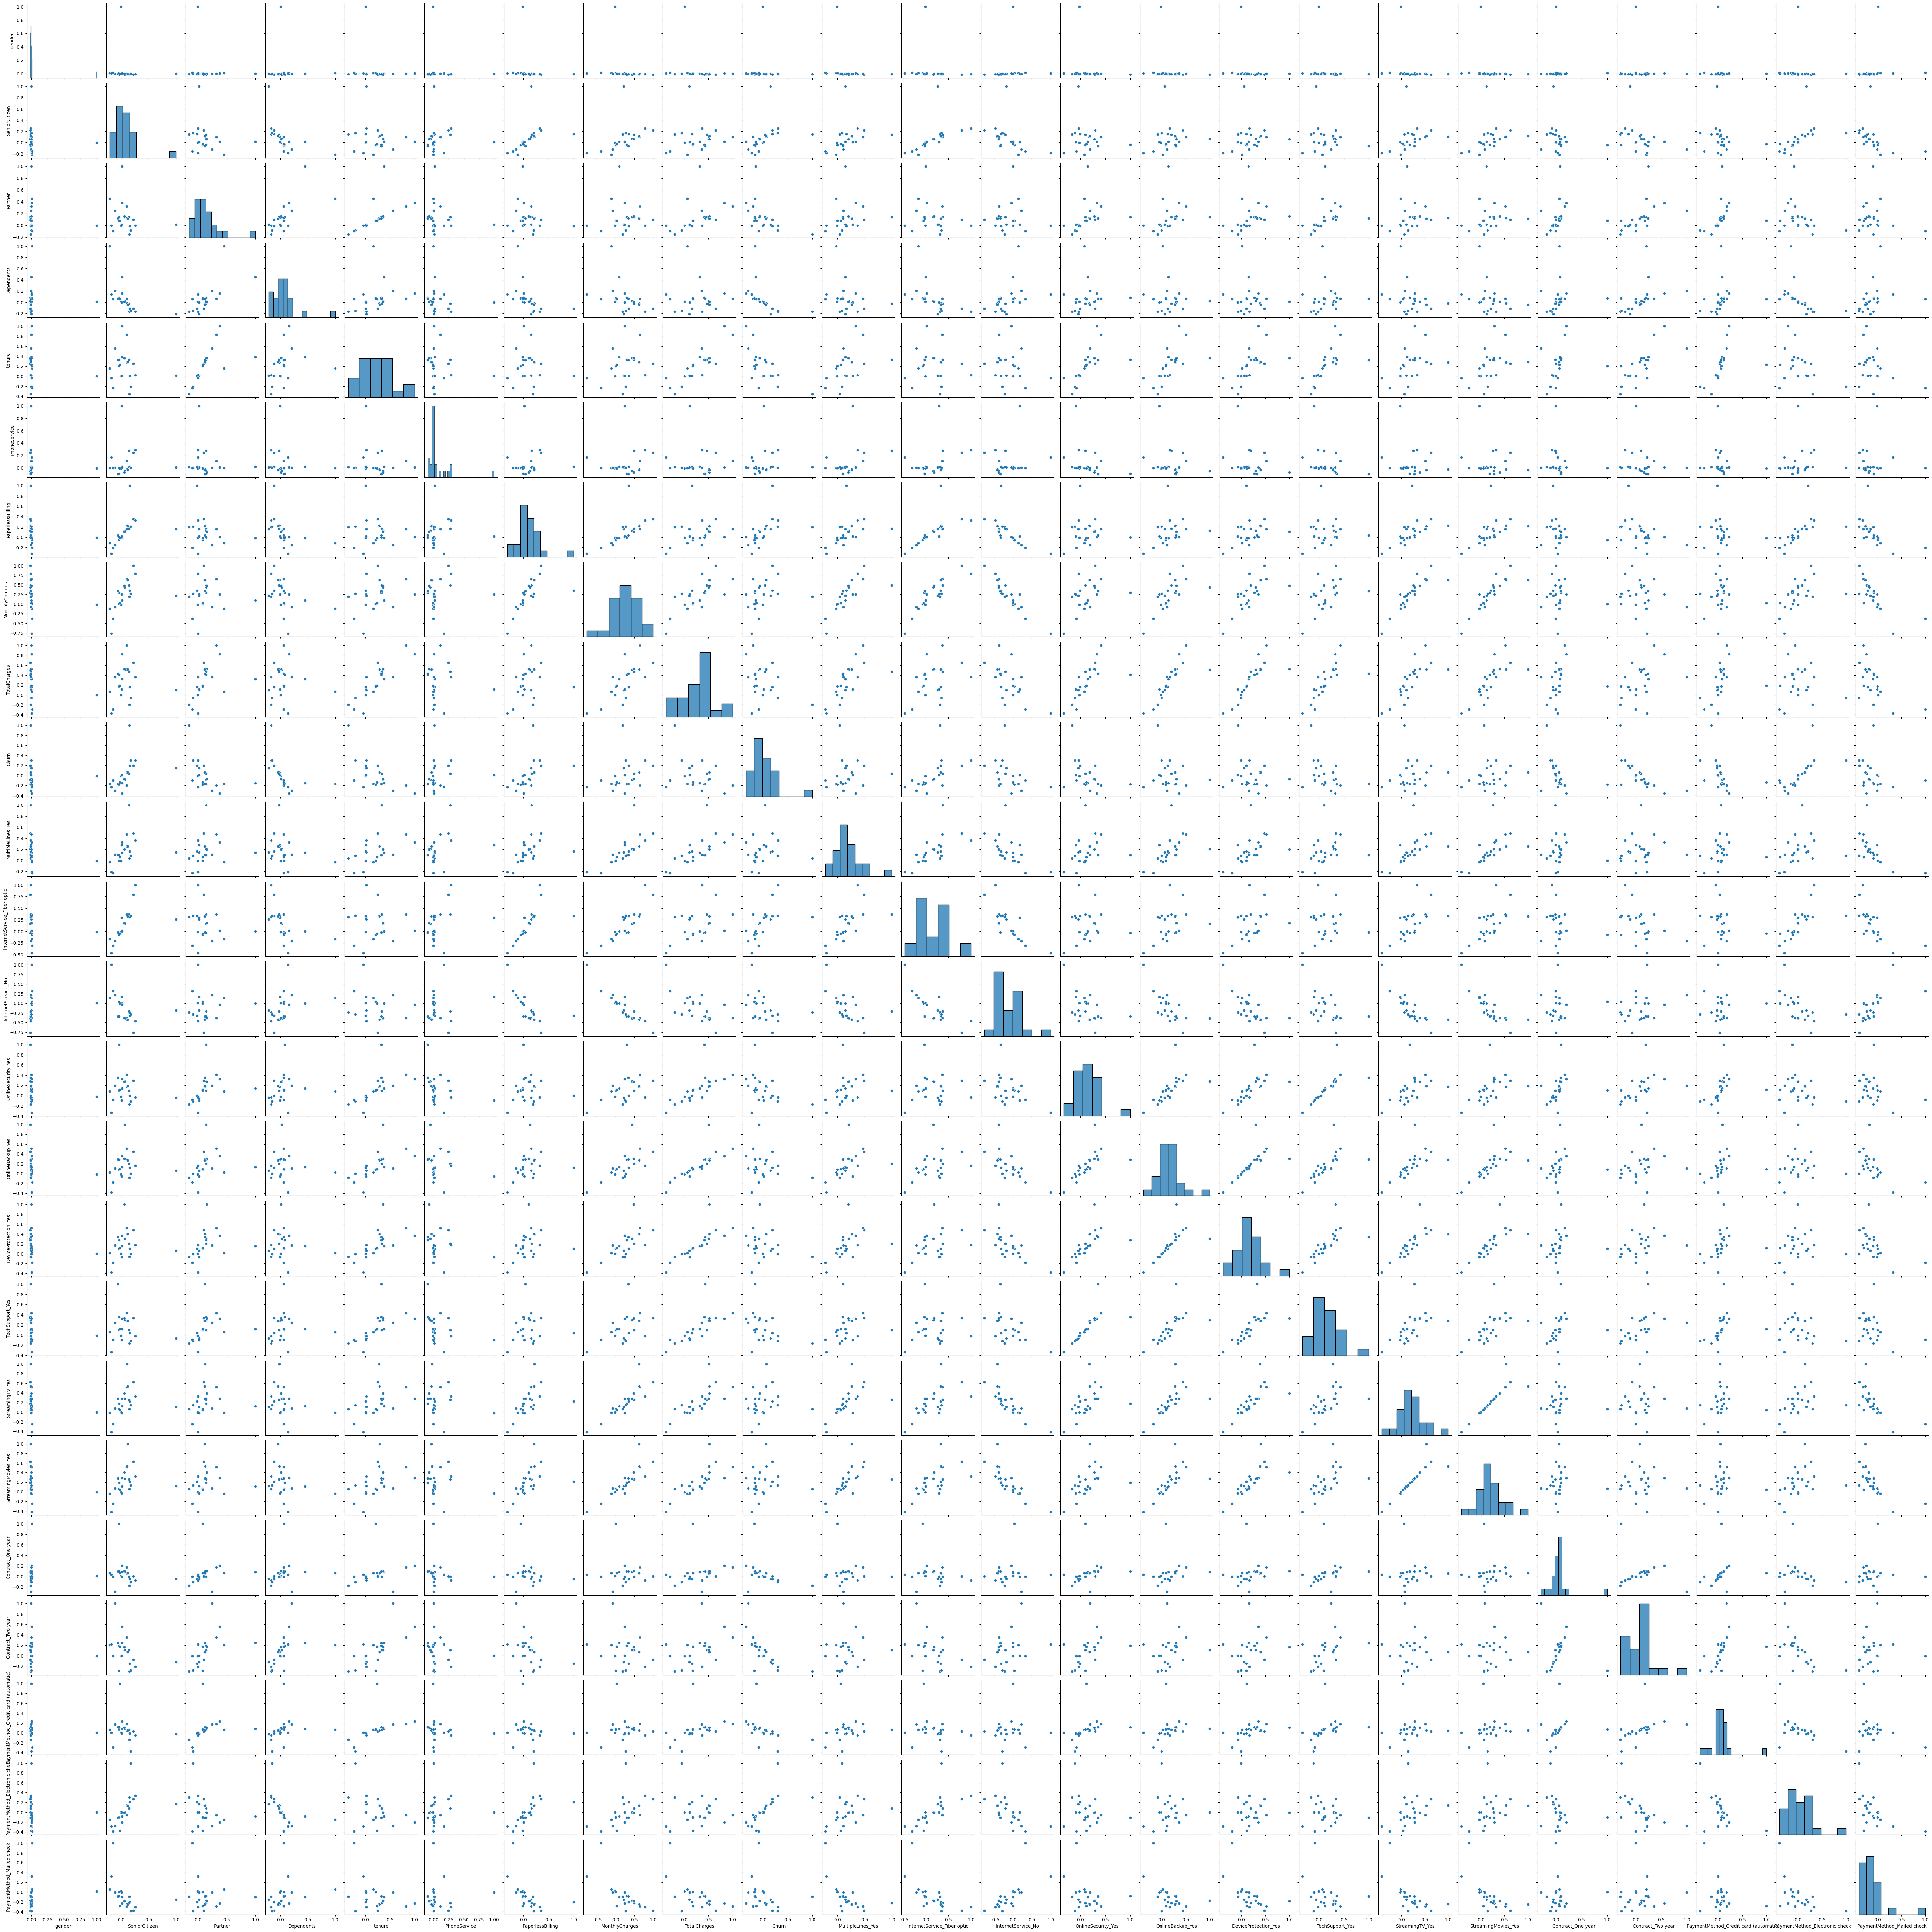

In [102]:
sns.pairplot(df_reduced.corr())

<Axes: >

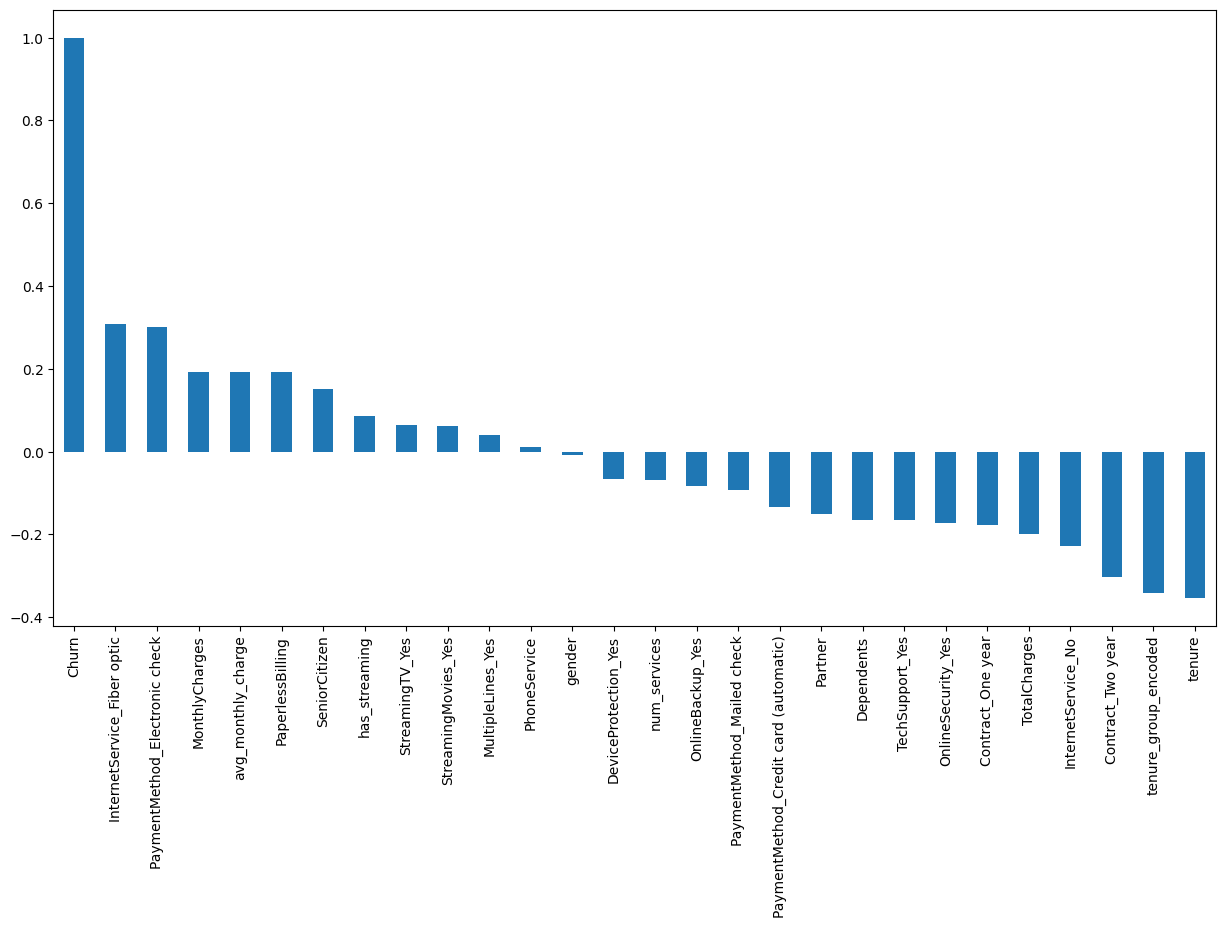

In [259]:
plt.figure(figsize=(15,8))
df_reduced.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [284]:
columns_to_drop = [
    'TotalCharges',
    'MonthlyCharges',
    'StreamingTV_Yes',
    'StreamingMovies_Yes',
    'tenure',
    'PhoneService',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'MultipleLines_Yes'
]

# Create the final modeling dataset
df_final = df_reduced.drop(columns=columns_to_drop, errors='ignore')
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,avg_monthly_charge,has_streaming,num_services,tenure_group_encoded
0,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.151302,0,1.0,0.0
1,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.301458,0,3.0,1.0
2,1,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.350966,0,3.0,0.0
3,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.786053,0,3.0,2.0
4,0,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.367602,0,1.0,0.0


# X, y - Train/Test

In [314]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']


In [315]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [316]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [301]:
print(X_train.shape)
print(X_test.shape)
print(X_res.shape)
print(y_train.shape)
print(y_test.shape)
print(y_res.shape)

(5634, 34)
(1409, 34)
(8278, 34)
(5634,)
(1409,)
(8278,)


In [302]:
print(y_res.value_counts())
print(y_test.value_counts())

Churn
0    4139
1    4139
Name: count, dtype: int64
Churn
0    1035
1     374
Name: count, dtype: int64


# Model training and Testing/Evaluation

In [317]:
class ModelTrainer:
    def __init__(self, models):
        """
        models: dict of {model_name: model_instance}
        """
        self.models = models
        self.results = []

    def evaluate_model(self, true, predicted, proba=None):
        accuracy = accuracy_score(true, predicted)
        f1 = f1_score(true, predicted)
        precision = precision_score(true, predicted)
        auc = roc_auc_score(true, proba) if proba is not None else None
        return accuracy, f1, precision, auc

    def train_and_evaluate(self, X_res, y_res, X_test, y_test):
        for name, model in self.models.items():
            print(f"Training model: {name}")
            model.fit(X_res, y_res)

            y_train_pred = model.predict(X_res)
            y_test_pred = model.predict(X_test)

            y_train_proba = model.predict_proba(X_res)[:, 1] if hasattr(model, "predict_proba") else None
            y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

            acc_train, f1_train, prec_train, auc_train = self.evaluate_model(y_res, y_train_pred, y_train_proba)
            acc_test, f1_test, prec_test, auc_test = self.evaluate_model(y_test, y_test_pred, y_test_proba)

            print(f"Model Performance for Training Set - {name}")
            print(f"- Accuracy:  {acc_train:.4f}")
            print(f"- F1 Score:  {f1_train:.4f}")
            print(f"- Precision: {prec_train:.4f}")
            print(f"- AUC-ROC:   {auc_train:.4f}")
            print("-" * 40)

            print(f"Model Performance for Test Set - {name}")
            print(f"- Accuracy:  {acc_test:.4f}")
            print(f"- F1 Score:  {f1_test:.4f}")
            print(f"- Precision: {prec_test:.4f}")
            print(f"- AUC-ROC:   {auc_test:.4f}")
            print("=" * 50)

            self.results.append({
                'Model': name,
                'Train Accuracy': acc_train,
                'Test Accuracy': acc_test,
                'Test F1': f1_test,
                'Test Precision': prec_test,
                'Test AUC': auc_test
            })

        return pd.DataFrame(self.results)


In [318]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.1),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=6, min_samples_leaf=8),
    'Random Forest': RandomForestClassifier(n_estimators=1500, max_depth=8, min_samples_leaf=2, min_samples_split=10, class_weight='balanced',max_features='log2', random_state=42),
    'XGBoost': XGBClassifier(n_estimators=1500, max_depth = 3, use_label_encoder=False, eval_metric='logloss', learning_rate=0.05),
    'CatBoost': CatBoostClassifier(verbose=False, iterations=1000, early_stopping_rounds=50)
}

trainer = ModelTrainer(models)
results_df = trainer.train_and_evaluate(X_train, y_train, X_test, y_test)

Training model: Logistic Regression
Model Performance for Training Set - Logistic Regression
- Accuracy:  0.8003
- F1 Score:  0.5704
- Precision: 0.6646
- AUC-ROC:   0.8392
----------------------------------------
Model Performance for Test Set - Logistic Regression
- Accuracy:  0.7828
- F1 Score:  0.5378
- Precision: 0.6181
- AUC-ROC:   0.8324
Training model: KNN
Model Performance for Training Set - KNN
- Accuracy:  0.8379
- F1 Score:  0.6780
- Precision: 0.7172
- AUC-ROC:   0.8979
----------------------------------------
Model Performance for Test Set - KNN
- Accuracy:  0.7580
- F1 Score:  0.5297
- Precision: 0.5470
- AUC-ROC:   0.7790
Training model: Decision Tree
Model Performance for Training Set - Decision Tree
- Accuracy:  0.8028
- F1 Score:  0.5841
- Precision: 0.6633
- AUC-ROC:   0.8513
----------------------------------------
Model Performance for Test Set - Decision Tree
- Accuracy:  0.7899
- F1 Score:  0.5569
- Precision: 0.6327
- AUC-ROC:   0.8189
Training model: Random Fo

In [265]:
# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [6, 8, 10],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# XGBoost hyperparameter grid
xgb_param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0.01],
    'reg_lambda': [1.0]
}

# Random Forest Grid Search
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# XGBoost Grid Search
xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)



In [266]:
# For Random Forest
rf_grid_search.fit(X_train, y_train)

# For XGBoost
xgb_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.05], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [300, 500],
                         'reg_alpha': [0.01], 'reg_lambda': [1.0],
                         'subsample': [0.8]},
             scoring='roc_auc', verbose=1)

In [268]:
best_rf_model = rf_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_


In [269]:
# Random Forest predictions
y_rf_pred = best_rf_model.predict(X_test)
y_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

# XGBoost predictions
y_xgb_pred = best_xgb_model.predict(X_test)
y_xgb_proba = best_xgb_model.predict_proba(X_test)[:, 1]

In [270]:
# Random Forest Evaluation
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred)
rf_auc = roc_auc_score(y_test, y_rf_proba)

# XGBoost Evaluation
xgb_accuracy = accuracy_score(y_test, y_xgb_pred)
xgb_f1 = f1_score(y_test, y_xgb_pred)
xgb_precision = precision_score(y_test, y_xgb_pred)
xgb_auc = roc_auc_score(y_test, y_xgb_proba)



In [271]:
print("Random Forest:")
print(f"- Accuracy:  {rf_accuracy:.4f}")
print(f"- F1 Score:  {rf_f1:.4f}")
print(f"- Precision: {rf_precision:.4f}")
print(f"- AUC-ROC:   {rf_auc:.4f}")
print("="*40)

print("XGBoost:")
print(f"- Accuracy:  {xgb_accuracy:.4f}")
print(f"- F1 Score:  {xgb_f1:.4f}")
print(f"- Precision: {xgb_precision:.4f}")
print(f"- AUC-ROC:   {xgb_auc:.4f}")


Random Forest:
- Accuracy:  0.7608
- F1 Score:  0.6349
- Precision: 0.5337
- AUC-ROC:   0.8468
XGBoost:
- Accuracy:  0.7999
- F1 Score:  0.5740
- Precision: 0.6597
- AUC-ROC:   0.8472


Fitting 5 folds for each of 162 candidates, totalling 810 fits


({'max_depth': 10,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 500},
 0.5717920661089739)

# Feature Importance

In [319]:
model_rf=trainer.models['Random Forest']

<Axes: >

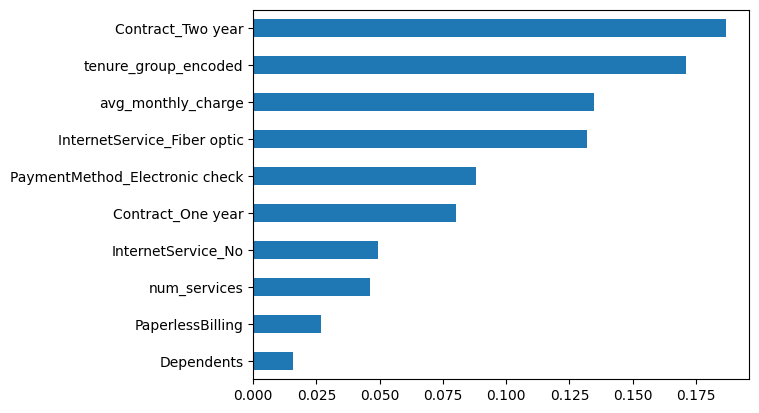

In [320]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [112]:
trainer.models

{'Logistic Regression': LogisticRegression(C=0.1, max_iter=1000),
 'KNN': KNeighborsClassifier(),
 'Decision Tree': DecisionTreeClassifier(max_depth=6, min_samples_leaf=8),
 'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=500),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tre

<Axes: >

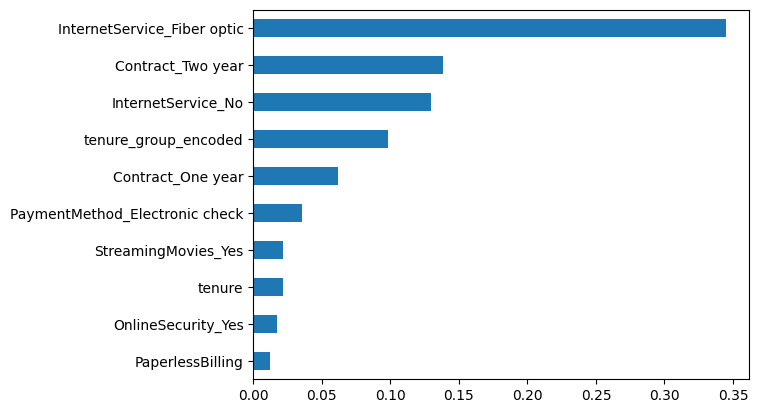

In [313]:
model_xgb=trainer.models['XGBoost']
importances = model_xgb.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')


In [118]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [114]:
df_reduced.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

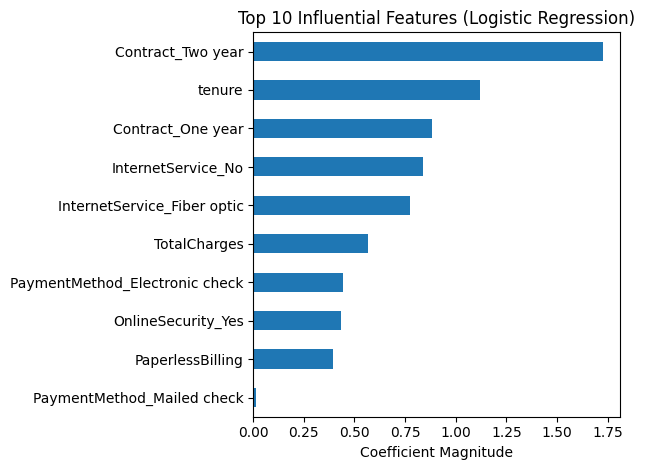

In [283]:
model_log=trainer.models['Logistic Regression']
importances = model_log.feature_names_in_
# Coefficients and feature names
coefs = model_log.coef_[0]  # shape: (n_features,)
feature_names = model_log.feature_names_in_

# Create a pandas Series with feature names and their corresponding coefficients
weights = pd.Series(coefs, index=feature_names)

# Show top 10 absolute weights (positive or negative)
weights.abs().sort_values().tail(10).plot(kind='barh')
plt.title("Top 10 Influential Features (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()